**Spatial Features**

Distribution of Pixels in an image

In [1]:
import cv2
import numpy as np

def compute_spatial_features(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Calculate spatial features
    height, width = image.shape
    center_x, center_y = width // 2, height // 2

    # Compute the average intensity of the image
    average_intensity = np.mean(image)

    # Compute the mean distance from each pixel to the image center
    distances_to_center = np.sqrt((np.arange(height)[:, np.newaxis] - center_y)**2 +
                                  (np.arange(width) - center_x)**2)
    mean_distance_to_center = np.mean(distances_to_center)

    # Compute the variance of pixel intensities
    intensity_variance = np.var(image)

    # Compute the horizontal and vertical gradients using Sobel operators
    gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Compute the mean and standard deviation of gradients
    mean_gradient_x = np.mean(gradient_x)
    std_gradient_x = np.std(gradient_x)
    mean_gradient_y = np.mean(gradient_y)
    std_gradient_y = np.std(gradient_y)


    return average_intensity, mean_distance_to_center, intensity_variance, \
           mean_gradient_x, std_gradient_x, mean_gradient_y, std_gradient_y


image_path = 'test.jpg'
features = compute_spatial_features(image_path)

print(f"Average Intensity: {features[0]}")
print(f"Mean Distance to Center: {features[1]}")
print(f"Intensity Variance: {features[2]}")
print(f"Mean Gradient X: {features[3]}, Std Gradient X: {features[4]}")
print(f"Mean Gradient Y: {features[5]}, Std Gradient Y: {features[6]}")


Average Intensity: 80.8962753830253
Mean Distance to Center: 392.54614161030804
Intensity Variance: 1859.299119304514
Mean Gradient X: -1.0686994619406616, Std Gradient X: 40.53092144508829
Mean Gradient Y: 0.02486624513618677, Std Gradient Y: 49.689796885588


**Fourier Transform**

Information about frequency components in image

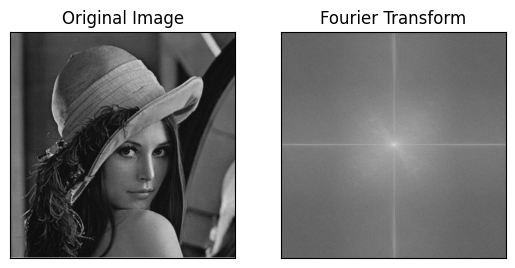

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def fourier_transform(image_path):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Perform Fourier Transform
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Calculate magnitude spectrum
    magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))

 
    plt.subplot(121), plt.imshow(image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Fourier Transform'), plt.xticks([]), plt.yticks([])

    plt.show()


image_path = 'test.jpg'
fourier_transform(image_path)


**Shape Features**

Calculates area, perimeter, compactness and eccentricity (image deviations)

In [3]:
import cv2
import numpy as np

def compute_shape_features(image_path):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Threshold the image to create a binary image
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize lists to store features for each contour
    areas = []
    perimeters = []
    compactness_values = []
    eccentricities = []

    for contour in contours:
        # Calculate area
        area = cv2.contourArea(contour)
        areas.append(area)

        # Calculate perimeter
        perimeter = cv2.arcLength(contour, closed=True)
        perimeters.append(perimeter)

        # Check if area is non-zero before calculating compactness
        if area != 0:
            # Calculate compactness (perimeter^2 / (4 * pi * area))
            compactness = (perimeter ** 2) / (4 * np.pi * area)
            compactness_values.append(compactness)
        else:
            compactness_values.append(0.0)

        # Fit an ellipse to the contour and calculate eccentricity
        if len(contour) >= 5:
            ellipse = cv2.fitEllipse(contour)
            eccentricity = ellipse[1][0] / ellipse[1][1]
            eccentricities.append(eccentricity)
        else:
            eccentricities.append(0.0)

    return areas, perimeters, compactness_values, eccentricities

# Example usage
image_path = 'test.jpg'
areas, perimeters, compactness_values, eccentricities = compute_shape_features(image_path)

# Display the computed features
for i in range(len(areas)):
    print(f"Object {i + 1} - Area: {areas[i]}, Perimeter: {perimeters[i]}, Compactness: {compactness_values[i]}, Eccentricity: {eccentricities[i]}")


Object 1 - Area: 0.0, Perimeter: 0.0, Compactness: 0.0, Eccentricity: 0.0
Object 2 - Area: 0.0, Perimeter: 0.0, Compactness: 0.0, Eccentricity: 0.0
Object 3 - Area: 0.0, Perimeter: 2.0, Compactness: 0.0, Eccentricity: 0.0
Object 4 - Area: 0.0, Perimeter: 4.0, Compactness: 0.0, Eccentricity: 0.0
Object 5 - Area: 0.0, Perimeter: 2.0, Compactness: 0.0, Eccentricity: 0.0
Object 6 - Area: 5.0, Perimeter: 21.313708305358887, Compactness: 7.229997835760796, Eccentricity: 0.7626876724252796
Object 7 - Area: 3.0, Perimeter: 6.828427076339722, Compactness: 1.2368306322699583, Eccentricity: 0.7071067492167155
Object 8 - Area: 0.0, Perimeter: 2.0, Compactness: 0.0, Eccentricity: 0.0
Object 9 - Area: 1.0, Perimeter: 4.828427076339722, Compactness: 1.8552459375096542, Eccentricity: 0.0
Object 10 - Area: 0.0, Perimeter: 0.0, Compactness: 0.0, Eccentricity: 0.0
Object 11 - Area: 1.0, Perimeter: 4.0, Compactness: 1.2732395447351628, Eccentricity: 0.0
Object 12 - Area: 4.5, Perimeter: 8.242640614509583,

**Edge Detection**

Detects Edges and Boundaries using Canny and Sobel (also used in Image Segmentation)

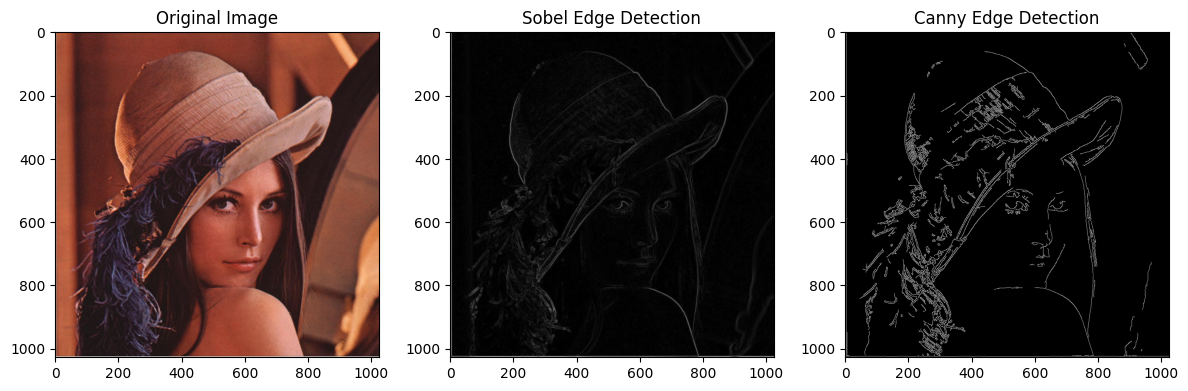

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('test.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply the Sobel operator
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)

# Convert the Sobel result to uint8 for display
sobel_result = np.uint8(255 * sobel_combined / np.max(sobel_combined))

# Apply the Canny edge detector
canny_edges = cv2.Canny(gray_image, 50, 150)

# Display the images with labels
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(sobel_result, cmap='gray')
plt.title('Sobel Edge Detection')

plt.subplot(1, 3, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')

plt.tight_layout()
plt.show()


**Moments**

Statistical measures that provide information about the distribution of pixel intensities in an image.

Hu moments - seven moments which derive from the central moments of the image. These values are invariant to simple operations such as rotation and scaling.

Zernike moments - capture different aspects of the shape and texture of the object

In [5]:
import cv2
import mahotas
import numpy as np

def compute_hu_moments(image_path):
    
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Threshold the image to create a binary image
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Select the first contour (assuming there is at least one)
    contour = contours[0]

    # Calculate Hu moments
    moments = cv2.moments(contour)
    hu_moments = cv2.HuMoments(moments).flatten()

    return hu_moments

def compute_zernike_moments(image_path, radius=21, degree=8):
    
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Threshold the image to create a binary image
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Calculate Zernike moments
    moments = mahotas.features.zernike_moments(binary_image, radius, degree)

    return moments


image_path = 'test.jpg'

# Hu moments
hu_moments = compute_hu_moments(image_path)
print("Hu Moments:")
print(hu_moments)

# Zernike moments
zernike_moments = compute_zernike_moments(image_path)
print("\nZernike Moments:")
print(zernike_moments)


Hu Moments:
[0. 0. 0. 0. 0. 0. 0.]

Zernike Moments:
[0.31830989 0.00168933 0.00176339 0.00267282 0.00350714 0.00361193
 0.00295341 0.00441224 0.00215581 0.00556863 0.00565518 0.0046672
 0.00417104 0.00608205 0.00296981 0.00347142 0.00795837 0.0079239
 0.00643506 0.00768999 0.00543642 0.00764792 0.00373642 0.0050507
 0.0042389 ]


**Haralick Texture features**

Computed from the GLCM approach, it keeps track of how often specific pairs of pixel intensities appear together at a certain distance and direction in the image

In [8]:
import numpy as np
from skimage import io, color, util
import mahotas

def compute_haralick_features(image_path):
    try:
        # Read the image in grayscale
        image = io.imread(image_path, as_gray=True)

        # Ensure the image is in uint8 format
        image = util.img_as_ubyte(image)

        # Compute Haralick texture features using mahotas
        haralick_features = mahotas.features.haralick(image)

        # Flatten the features for easier representation
        haralick_features_flat = haralick_features.flatten()

        return haralick_features_flat

    except FileNotFoundError as e:
        print(e)
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

# Example usage
image_path = 'test.jpg'  # Provide the full path to the image file
haralick_features = compute_haralick_features(image_path)

if haralick_features is not None:
    # Display the computed features
    print("Haralick Texture Features:")
    print(haralick_features)


Haralick Texture Features:
[ 1.44593209e-03  4.04871791e+01  9.88530111e-01  1.76493341e+03
  4.12972779e-01  1.53319082e+02  7.01924648e+03  8.04080213e+00
  1.07316041e+01  7.33665037e-04  2.97157870e+00 -4.78494356e-01
  9.99414335e-01  1.10552982e-03  1.10189684e+02  9.68408922e-01
  1.74400005e+03  3.38567265e-01  1.53022348e+02  6.86581050e+03
  8.02950760e+00  1.11253502e+01  5.80755589e-04  3.34049094e+00
 -4.21689453e-01  9.98689549e-01  1.66794203e-03  7.07994614e+01
  9.79823641e-01  1.75451531e+03  4.48690134e-01  1.53179680e+02
  6.94726176e+03  8.03782411e+00  1.05448322e+01  8.11367284e-04
  2.82125200e+00 -5.04493511e-01  9.99593254e-01  1.13958558e-03
  1.08325987e+02  9.68943308e-01  1.74400397e+03  3.44724275e-01
  1.53022373e+02  6.86768987e+03  8.02891454e+00  1.10655423e+01
  5.99369211e-04  3.28032545e+00 -4.30174916e-01  9.98837389e-01]


**Gabor Filters**

Analyze textures in image (also in feature_extraction.ipynb for different image)

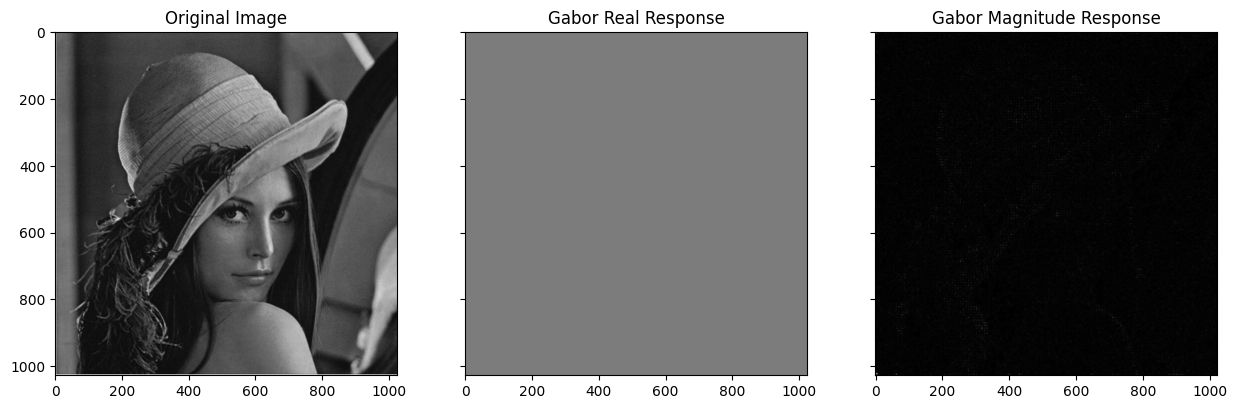

In [1]:
import numpy as np
from skimage import io, color, filters
import matplotlib.pyplot as plt

image_path = 'test.jpg'
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Set Gabor filter parameters
frequency = 0.6
theta = np.pi / 4  # Orientation of the Gabor filter
sigma = 1.5
n_stds = 3  # Number of standard deviations

# Apply the Gabor filter
gabor_response_real, gabor_response_imag = filters.gabor(gray_image, frequency, theta=theta, sigma_x=sigma, sigma_y=sigma, n_stds=n_stds)

# Compute the magnitude of the Gabor response
gabor_magnitude = np.sqrt(gabor_response_real**2 + gabor_response_imag**2)

# Display Gabor response
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

ax1.imshow(gray_image, cmap=plt.cm.gray)
ax1.set_title('Original Image')

ax2.imshow(gabor_response_real, cmap=plt.cm.gray)
ax2.set_title('Gabor Real Response')

ax3.imshow(gabor_magnitude, cmap=plt.cm.gray)
ax3.set_title('Gabor Magnitude Response')

plt.show()


**Local Binary Pattern - LBP (texture classification)**

Considers intensity of pixels and compares to its neighboring pixels.

c:\Users\jothi\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


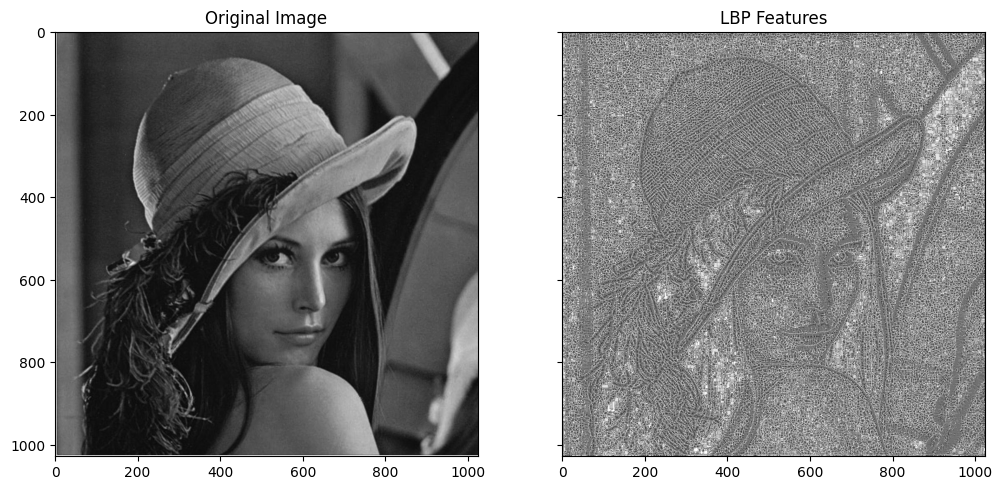

In [2]:
import numpy as np
from skimage import io, color, feature
import matplotlib.pyplot as plt

image_path = 'test.jpg'
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Set LBP parameters
radius = 1
n_points = 8 * radius

# Compute the LBP features
lbp = feature.local_binary_pattern(gray_image, n_points, radius, method='uniform')

# Calculate the histogram of LBP features
hist, _ = np.histogram(lbp, bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

# Normalize the histogram
hist = hist.astype("float")
hist /= (hist.sum() + 1e-7)

#Visualize the LBP

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.imshow(gray_image, cmap=plt.cm.gray)
ax1.set_title('Original Image')

ax2.imshow(lbp, cmap='gray')
ax2.set_title('LBP Features')

plt.show()